In [7]:
 import numpy as np
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
from analysis_utils import load_learning_curve_results

Notebook for plotting figures from the learning curve data where we plot RMSE and NLPD against number of data points
for the different test cases

In [8]:
results_df = load_learning_curve_results()


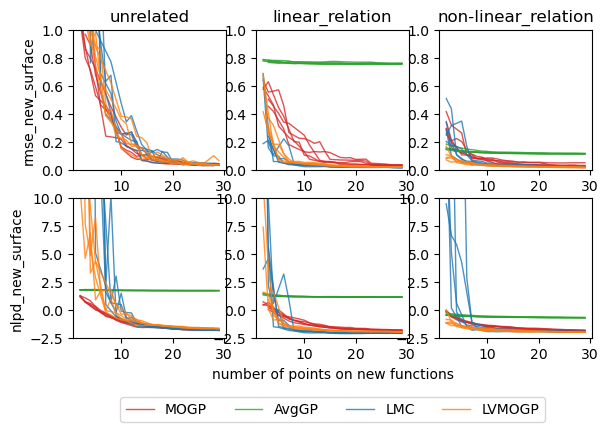

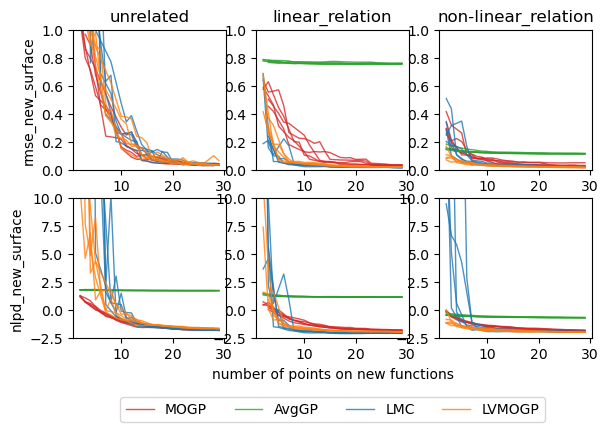

In [11]:
def get_colors():
    cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = {'lmc': cols[0], 'mo_indi': cols[3], 'lvmogp': cols[1], 'avg': cols[2]}
    return colors

model_names =['mo_indi', 'avg', 'lmc', 'lvmogp', ]
colors = get_colors()

surface_type_names = {'unrelated_two_observed_10_new':'Uncorrelated','linear_relation_two_observed_10_new':'Linearly\nCorrelated',
                 'non-linear_relation_two_observed_10_new':'Non-Linearly\nCorrelated'}
mod_names = {'mo_indi':'MOGP', 'lmc':'LMC', 'avg':'AvgGP', 'lvmogp':'LVMOGP'}
cm = 1/2.54
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(17*cm, 4))
seed = 2

for i, surface_type in enumerate(surface_types):
    for j, metric in enumerate(['rmse_new_surface', 'nlpd_new_surface']):
        for k, model_name in enumerate(model_names):
            for data_seed in results_df['data_seed'].unique():
                temp_df = results_df[(results_df['surface_type'] == surface_type)
                                     & (results_df['model'] == model_name) & (results_df['seed'] == seed)
                & (results_df['data_seed'] == data_seed)]
                if data_seed == 1:
                    label=mod_names[model_name]
                else: label = None
                axs[j, i].plot(temp_df['n_new_points'], temp_df[metric], alpha=0.8,   color=colors[model_name], linewidth=1,
                               label=label)
        axs[j, 0].set_ylabel(metric)
    axs[0, i].set_title(surface_type)
    axs[1, i].set_ylim(-2.5, 10)
    axs[0, i].set_ylim(0, 1)
axs[1, 1].set_xlabel('number of points on new functions')
axs[1, 1].legend( bbox_to_anchor=(0.5, -0.65), loc='lower center', ncol=4)
# plt.tight_layout()

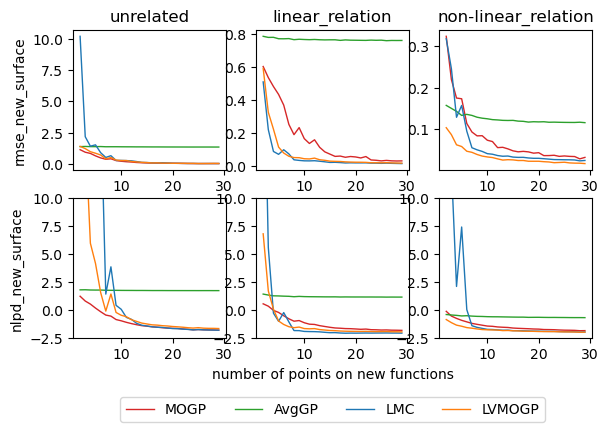

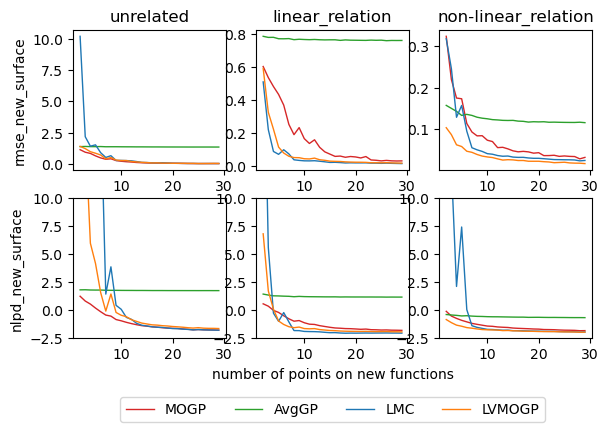

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(17*cm, 4))
seed = 2

for i, surface_type in enumerate(surface_types):
    for j, metric in enumerate(['rmse_new_surface', 'nlpd_new_surface']):
        for k, model_name in enumerate(model_names):
                temp_df_ = results_df[(results_df['surface_type'] == surface_type)
                                     & (results_df['model'] == model_name) & (results_df['seed'] == seed)]
                temp_df = temp_df_.groupby('n_new_points').mean().reset_index()
                temp_df_min = temp_df_.groupby('n_new_points').min().reset_index()
                temp_df_max = temp_df_.groupby('n_new_points').max().reset_index()
                axs[j, i].plot(temp_df['n_new_points'], temp_df[metric],  color=colors[model_name], linewidth=1,
                               label=mod_names[model_name])
                # axs[j, i].fill_between(temp_df['n_new_points'], temp_df[metric]+temp_df_min[metric],
                #                        temp_df[metric]-temp_df_min[metric], alpha=0.2,  color=colors[model_name])
        axs[j, 0].set_ylabel(metric)
    axs[0, i].set_title(surface_type)
    axs[1, i].set_ylim(-2.5, 10)
    # axs[0, i].set_ylim(0, 1)
axs[1, 1].set_xlabel('number of points on new functions')
axs[1, 1].legend( bbox_to_anchor=(0.5, -0.65), loc='lower center', ncol=4)